<h1>Using Fourier transform for time series decomposition <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fourier-Analysis" data-toc-modified-id="Fourier-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fourier Analysis</a></span></li><li><span><a href="#Fourier-Transform-in-Python" data-toc-modified-id="Fourier-Transform-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fourier Transform in <em>Python</em></a></span><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise 1</a></span></li></ul></li><li><span><a href="#Exercise-2:-Frequency-filtering-by-using-Fourier-Transform-frequencies" data-toc-modified-id="Exercise-2:-Frequency-filtering-by-using-Fourier-Transform-frequencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 2: Frequency filtering by using Fourier Transform frequencies</a></span></li><li><span><a href="#Exercise-3:-Frequency-filtering-by-using-Fourier-Transform-amplitudes" data-toc-modified-id="Exercise-3:-Frequency-filtering-by-using-Fourier-Transform-amplitudes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 3: Frequency filtering by using Fourier Transform amplitudes</a></span></li><li><span><a href="#Exercise-4:-Finalize-your-pipeline" data-toc-modified-id="Exercise-4:-Finalize-your-pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 4: Finalize your pipeline</a></span></li><li><span><a href="#Exercise-5:-Compbine-both-filter-approaches" data-toc-modified-id="Exercise-5:-Compbine-both-filter-approaches-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 5: Compbine both filter approaches</a></span></li><li><span><a href="#Exercise-6:-Application-to-real-world-data" data-toc-modified-id="Exercise-6:-Application-to-real-world-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 6: Application to real world data</a></span></li></ul></div>

In this chapter, we learn how to make use of Fast Fourier Transform (FFT) to deconstruct time series.

We start with an easy example. Let's recap the example from the _Basic time series analysis_ chapter, where we've generated an artificial signal. We modify it a bit in order to better account for the sampling frequency of our signal:

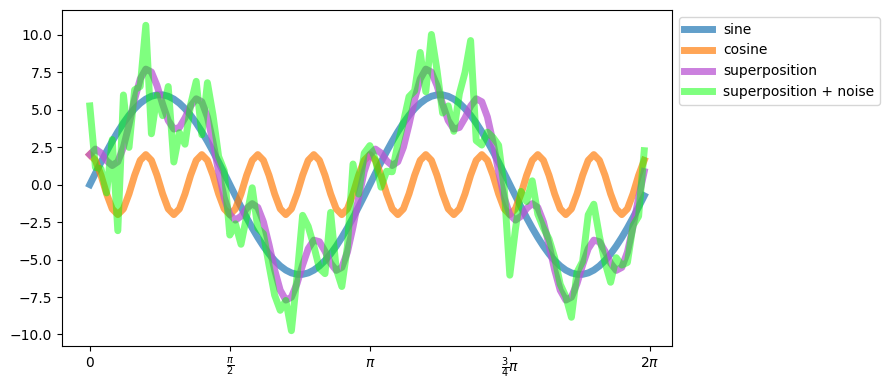

In [ ]:
# Create some dummy data:
import numpy as np
import matplotlib.pyplot as plt 
       # imports most relevant Matplotlib commands

# define frequencies, amplitudes, and sampling rate and time array:
f1 =  2  # Frequency 1 in Hz
f2 = 10  # Frequency 2 in Hz
A1 = 6   # Amplitude 1
A2 = 2   # Amplitude 2
Fs = 100 # Sampling rate
t  = np.arange(0,1,1/Fs)

# calculate prime signals:
A_sin = A1 * np.sin(2 * np.pi * f1 * t)
A_cos = A2 * np.cos(2 * np.pi * f2 * t)
A_signal = A_sin + A_cos

# add some noise:
np.random.seed(1)
A_Noise = 2
Noise = np.random.randn(len(t)) * A_Noise
A_signal_noisy = A_signal + Noise

# plots:
fig=plt.figure(3, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=5, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_noisy, lw=5, c="lime", 
         label="superposition + noise", alpha=0.5)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Note</b>: The expressions within the `xtick` command of the above plot are $\LaTeX$ commands. You can find further information about the usage of $\LaTeX$ in <i>Markdown</i> documents and, hence, also in <i>Jupyter</i> notebooks <a href="https://www.fabriziomusacchio.com/teaching/Markdown_Guide/#latex-commands">here</a>. An overview of the most common $\LaTeX$ commands can be found in this <a href="https://www.fabriziomusacchio.com/teaching/LaTeX_Guide/">guide</a>.
</div>

We again see, that our signal is a superposition of a sine and cosine wave (`A_signal`) plus some random noise (`A_signal_noisy`). Now, we make use of Fourier Transform in order to deconstruct the signal.

## Fourier Analysis
[**Fourier analysis**](https://en.wikipedia.org/wiki/Fourier_analysis), also know as harmonic analysis, is the mathematical field of _Fourier series_ and _Fourier integrals_. A [**Fourier series**](https://en.wikipedia.org/wiki/Fourier_series#Definition) decomposes any periodic function (or signal) into the (possibly) infinite sum of a set of simple sine and cosine functions or, equivalently, complex exponentials. The [**Fourier transform**](https://en.wikipedia.org/wiki/Fourier_transform) is a tool for decomposing functions depending on _space_ or _time_ into functions depending on their component _spatial_ or _temporal frequency_.





## Fourier Transform in _Python_
For _Python_, where are several Fast Fourier Transform implementations availble. Here, we will use the `fft` function from the `scipy.fft` package: 

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

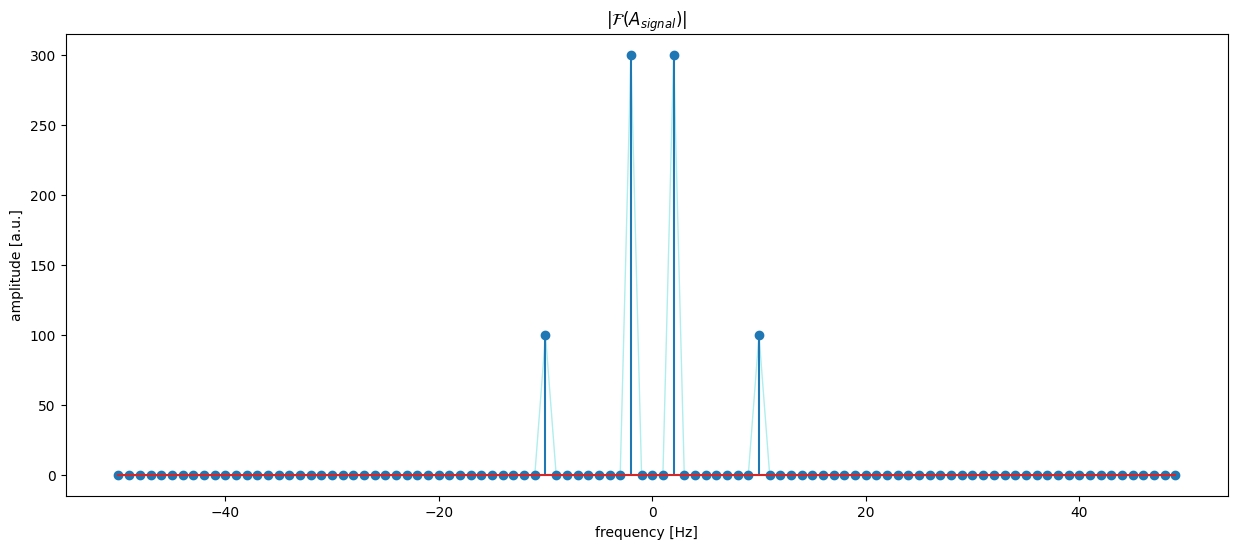

In [ ]:
import scipy.fft
A_signal_fft = scipy.fft.fft(A_signal)
frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)

fig=plt.figure(2, figsize=(15,6))
plt.clf()
plt.plot(frequencies, np.abs(A_signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(A_signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

Text(0.5, 1.0, '$|\\mathcal{F}(A_{signal})|$')

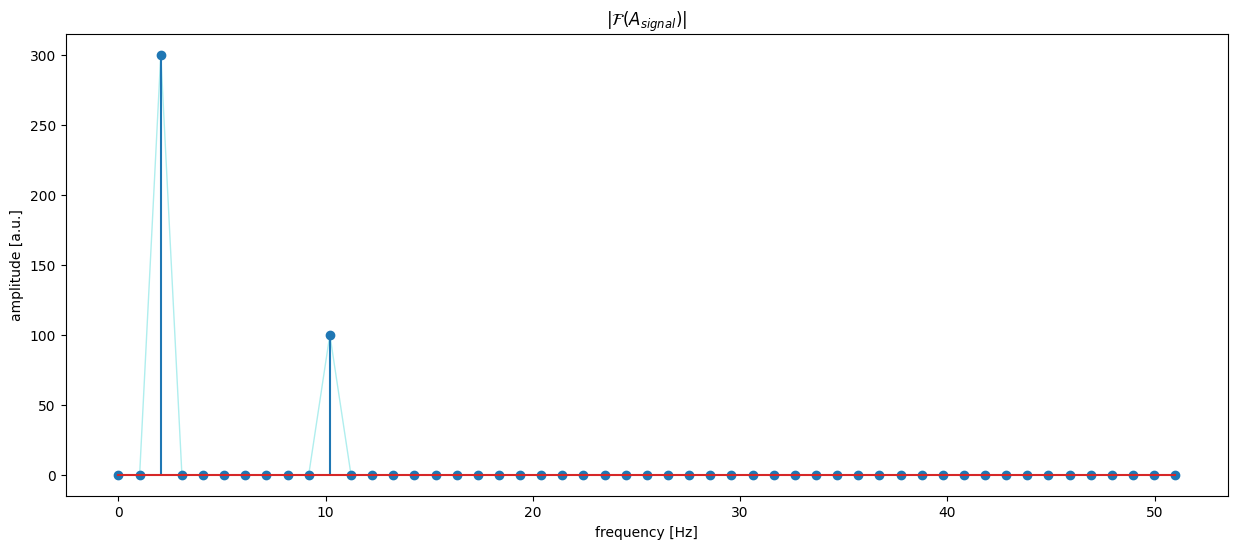

In [ ]:
frequency_eval_max = 100
A_signal_rfft = scipy.fft.rfft(A_signal, n=frequency_eval_max)
n = np.shape(A_signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig=plt.figure(3, figsize=(15,6))
plt.clf()
plt.plot(frequencies_rel, np.abs(A_signal_rfft), lw=1.0, c='paleturquoise')
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

The Fourier transformed signal $|\mathcal{F}(A_{signal})|$ can also be transformed back to the spatial domain, $|\mathcal{F}^{-1}(A_{signal})|$, by applying the fast inverse Fourier transform function `irfft`:

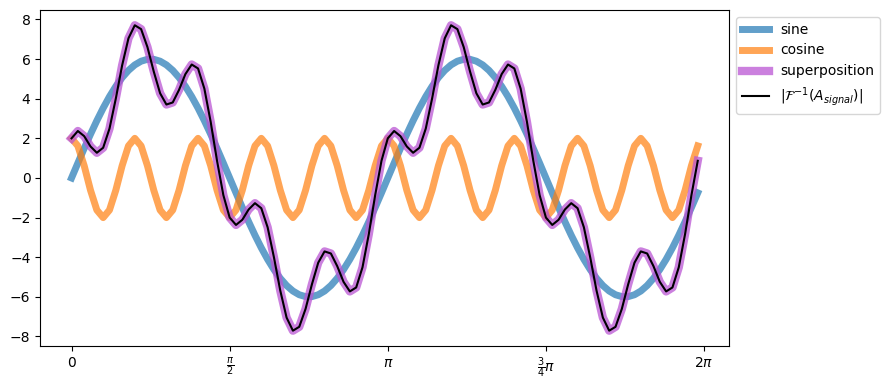

In [ ]:
A_signal_irfft = scipy.fft.irfft(A_signal_rfft)

fig=plt.figure(4, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=6, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_irfft,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()

### Exercise 1
1. Apply and plot the Fast Fourier Transform to the noisy signal `A_signal_noisy`.
2. What do you notice?

In [ ]:
# You solution 1 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 1
frequency_eval_max = 100
A_signal_rfft = scipy.fft.rfft(A_signal_noisy, n=frequency_eval_max)
n = np.shape(A_signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig=plt.figure(3)
plt.clf()
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")
``` 
<script src="https://gist.github.com/username/a39a422ebdff6e732753b90573100b16.js"></script>
</details>

## Exercise 2: Frequency filtering by using Fourier Transform frequencies
1. Use the function `find_closest_within_array` defined below to find the index `idx` of the value within the `frequencies_rel` array, that is closest to the frequency of 10 Hz.
2. Use the output index `idx` to set the corresponding amplutide of the Fourier transformed signal `A_signal_rfft` to zero. Then, retransform the Fourier signal and plot the filtered signal.
3. Reapply your script for a filter frequency of 2 Hz.
4. Reapply your script for the noisy signal.

In [ ]:
def find_closest_within_array(array, value):
    """ Finds closest value within an array.
    
        array: input NumPy array (can also be a list)
        value: value to search for
        
        array[idx]: found closest value within array
        idx:        index of the found closest value 
        
    """
    numpy_array = np.asarray(array) 
    idx = (np.abs(numpy_array-value)).argmin()
    return array[idx], idx

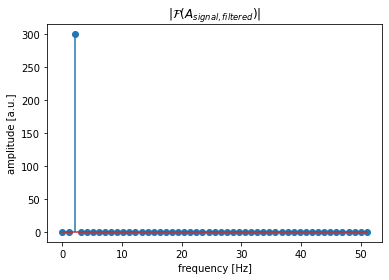

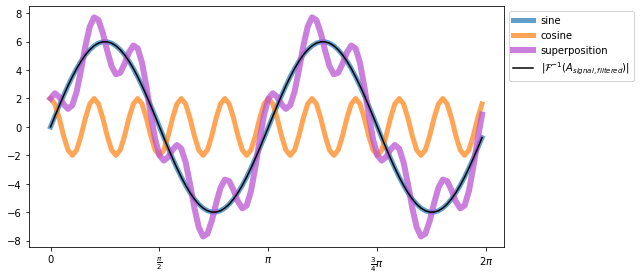

In [ ]:
# Your solution 2 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 2:
frequency_eval_max = 100
A_signal_rfft = scipy.fft.rfft(A_signal, n=frequency_eval_max)
n = np.shape(A_signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

filter_frequency = 10
val, idx = find_closest_within_array(frequencies_rel, 
                                     filter_frequency)
A_signal_rfft[idx] = 0
A_signal_filtered = scipy.fft.irfft(A_signal_rfft)

fig=plt.figure(5)
plt.clf()
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal, filtered})|$")

fig=plt.figure(6, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal, lw=6, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_filtered,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal, filtered})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()
``` 
<script src="https://gist.github.com/username/a39a422ebdff6e732753b90573100b16.js"></script>
</details>

## Exercise 3: Frequency filtering by using Fourier Transform amplitudes
With the filter approach shown above we are able to specifically filter for a certain frequency. However, to filter, e.g., random noise that is present in almost every frequency (with low amplitudes though), this approach will not work. For such cases we need an alternative approach, that filters for amplitudes within the Fourier transformed signal instead for the corresponding frequency:

1. Define a threshold `A_pass_limit = 50`, that sets the lower bound of the amplitudes we want to keep within the Fourier transform $|\mathcal{F}(A_{signal})|$ of our noisy signal (`A_signal_rfft`). Filter `A_signal_rfft` by setting all of its values, that are lower than `A_pass_limit`, to zero. 
2. Retransform the Fourier signal and plot the resulting filtered signal.

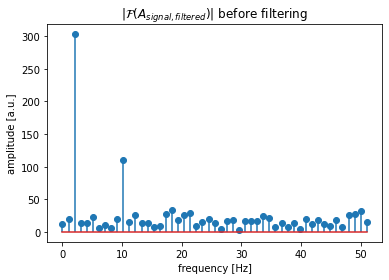

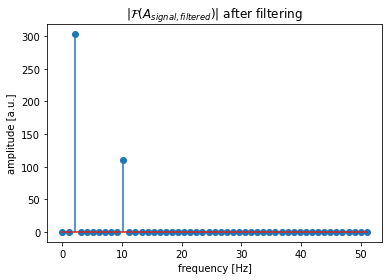

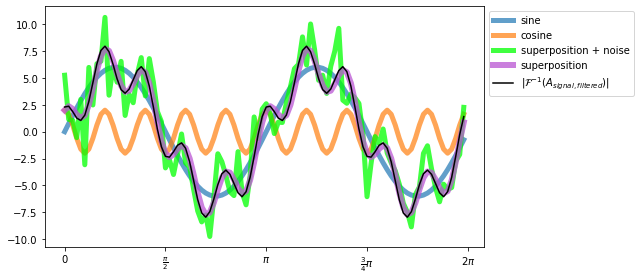

In [ ]:
# Your solution 3 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 3:
frequency_eval_max = 100
A_signal_rfft = scipy.fft.rfft(A_signal_noisy, n=frequency_eval_max)
n = np.shape(A_signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig=plt.figure(7)
plt.clf()
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal, filtered})|$ before filtering")

A_pass_limit = 50
A_signal_rfft[np.abs(A_signal_rfft)<A_pass_limit]=0
A_signal_filtered = scipy.fft.irfft(A_signal_rfft)

fig=plt.figure(8)
plt.clf()
plt.stem(frequencies_rel, np.abs(A_signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal, filtered})|$ after filtering")

fig=plt.figure(9, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
plt.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
plt.plot(t, A_signal_noisy, lw=5, c="lime", 
         label="superposition + noise", alpha=0.75)
plt.plot(t, A_signal, lw=6, c="mediumorchid", 
         label="superposition", alpha=0.75)
plt.plot(t, A_signal_filtered,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal, filtered})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks([0, 0.25, 0.5, 0.75, 1], 
           ["0", r"$\frac{\pi}{2}$", r"$\pi$", 
            r"$\frac{3}{4}\pi$", r"$2\pi$"])
plt.tight_layout()
plt.show()
``` 
</script>
</details>

**Note**: '$|\mathcal{F}^{-1}(A_{signal, filtered})|$' is [$\LaTeX$](https://www.fabriziomusacchio.com/teaching/LaTeX_Guide/).

## Exercise 4: Finalize your pipeline

1. Put the filter solution from Exercise 2 into a function, e.g., called `frequency_filter`. Define the function in such a way, that it outputs the filtered signal, the Fourier transform of the signal, the filtered Fourier transform of the signal as well as the corresponding frequency array (`frequencies_rel`).
2. Apply your function to `A_signal` as well as to `A_signal_noisy`, both for a filter frequency of 10 and 2 Hz, respectively.
3. Repeat 1. and 2. for the solution from Exercise 3 (call the function, e.g., `amplitude_filter`).

**Hint**: It is advisable to also put your plot commands into a plot function in order to avoid code repetitions within your script.

In [ ]:
# Your solution 4.1 and 4.2 here:

"""Hints:

def frequency_filter(signal, filter_frequency, 
                     frequency_eval_max):
    ...
    return (e.g.) signal_filtered, signal_rfft_filtered,  
                  signal_rfft, frequencies_rel


def plot_comparison(frequencies_rel, Current_signal_rfft, 
                    Current_signal, fignum=1):
    ...
    return NOTHING

"""

In [ ]:
# Your solution 4.1 and 4.2 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.1 and 4.2:
def frequency_filter(signal, filter_frequency, frequency_eval_max):
    signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
    n = np.shape(signal_rfft)[0]
    frequencies_rel = n * Fs / frequency_eval_max * np.linspace(0, 1, int(n))
    val, idx = find_closest_within_array(frequencies_rel, filter_frequency)

    signal_rfft_filtered = signal_rfft.copy()
    signal_rfft_filtered[idx] = 0
    signal_filtered = scipy.fft.irfft(signal_rfft_filtered)
    return signal_filtered, signal_rfft_filtered, signal_rfft, frequencies_rel

def plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=1):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, num=fignum, clear=True, figsize=(9, 8))
    ax1.stem(frequencies_rel, np.abs(Current_signal_rfft))
    ax1.set_title(r"$|\mathcal{F}(A_{signal})|$")
    ax1.set_xlabel("frequency [Hz]")
    ax1.set_ylabel("amplitude [a.u.]")

    ax2.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
    ax2.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
    ax2.plot(t, Current_signal, lw=5, c="lime", label="superposition + noise", alpha=0.5)
    ax2.plot(t, A_signal, lw=5, c="mediumorchid", label="superposition", alpha=0.75)
    ax2.legend(loc='upper right', fontsize=8)
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", r"$\frac{\pi}{2}$",
                                         r"$\pi$", r"$\frac{3}{4}\pi$", r"$2\pi$"])
    ax2.set_title("Results")
    ax2.set_xlabel("x [rad]")

    ax3.stem(frequencies_rel, np.abs(Current_signal_rfft_filtered))
    ax3.set_title(r"$|\mathcal{F}(A_{signal, filtered})|$")
    ax3.set_xlabel("frequency [Hz]")
    ax3.set_ylabel("amplitude [a.u.]")

    ax4.plot(t, A_sin, label="sine", lw=5, alpha=0.7)
    ax4.plot(t, A_cos, label="cosine", lw=5, alpha=0.7)
    ax4.plot(t, Current_signal, lw=5, c="lime", label="superposition + noise", alpha=0.5)
    ax4.plot(t, A_signal, lw=5, c="mediumorchid", label="superposition", alpha=0.75)
    ax4.plot(t, Current_signal_filtered, c='k',
             label="$\mathcal{F}^{-1}(A_{signal, filtered})$")
    ax4.legend(loc='upper right', fontsize=8)
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", r"$\frac{\pi}{2}$",
                                         r"$\pi$", r"$\frac{3}{4}\pi$", r"$2\pi$"])
    ax4.set_title("Results")
    ax4.set_xlabel("x [rad]")

    plt.tight_layout()
    plt.show()

filter_frequency = 10
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    frequency_filter(signal=Current_signal, filter_frequency=filter_frequency, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=2)
~~~
</details>

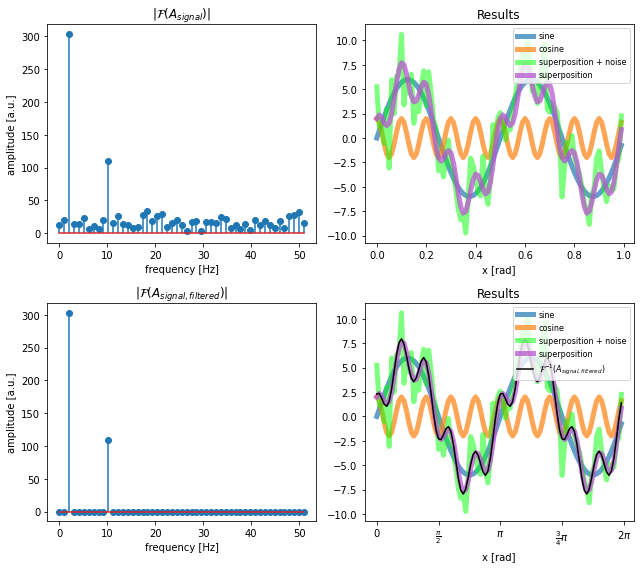

In [ ]:
# Your solution 4.3 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.3:
def amplitude_filter(signal, A_pass_limit, frequency_eval_max):
    signal_rfft = scipy.fft.rfft(signal, n=frequency_eval_max)
    n = np.shape(signal_rfft)[0]
    frequencies_rel = n * Fs / frequency_eval_max * np.linspace(0, 1, int(n))
    signal_rfft_filtered = signal_rfft.copy()
    signal_rfft_filtered[np.abs(signal_rfft_filtered)<A_pass_limit]=0
    signal_filtered = scipy.fft.irfft(signal_rfft_filtered)
    return signal_filtered, signal_rfft_filtered, signal_rfft, frequencies_rel

A_pass_limit = 50
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    amplitude_filter(signal=Current_signal, A_pass_limit=A_pass_limit, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=1)
~~~
</details>

## Exercise 5: Compbine both filter approaches
So far, we have applied both filter functions separately. In order to, e.g., apply noise reduction and the exclusion of a certain frequency, you can combine both filters by applying them one after the other:

1. Apply the `amplitude_filter` function to the noisy signal `A_noisy_signal` in order to filter out the noise.
2. Re-use the resulting filtered signal and apply the `frequency_filter` function to it (filter for the frequency 2 or 10 Hz).

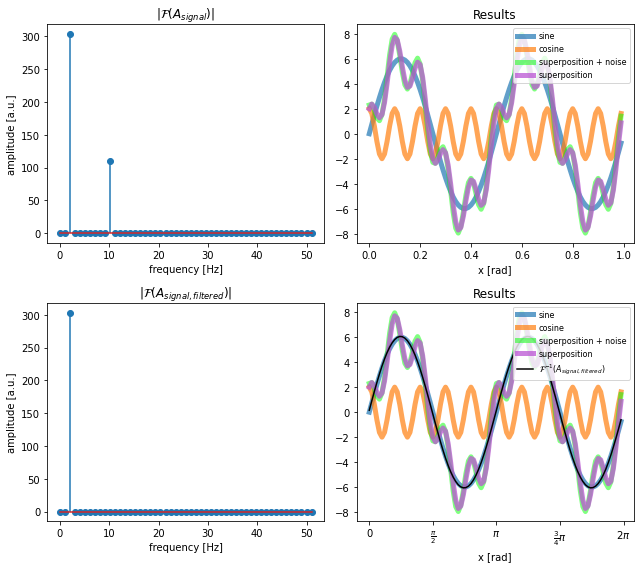

In [ ]:
# Your solution 5 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 5: 
A_pass_limit = 50
frequency_eval_max = 100
Current_signal = A_signal_noisy
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    amplitude_filter(signal=Current_signal, A_pass_limit=A_pass_limit, frequency_eval_max=100)


filter_frequency = 10
frequency_eval_max = 100
Current_signal = Current_signal_filtered
Current_signal_filtered, Current_signal_rfft_filtered, Current_signal_rfft, frequencies_rel = \
    frequency_filter(signal=Current_signal, filter_frequency=filter_frequency, frequency_eval_max=100)

plot_comparison(frequencies_rel, Current_signal_rfft, Current_signal,
                    A_sin, A_cos, A_signal, fignum=2)
~~~
</details>

## Exercise 6: Application to real world data
Now, we apply our two filter functions to the data from the _Patch Clamp Analysis_ chapter:

1. Recap the [_Analyzing patch clamp recordings_](https://github.com/FabrizioMusacchio/Python_Neuro_Practical/blob/master/04%20Analyzing%20patch%20clamp%20recordings.ipynb) chapter and write a script, that reads the _IGOR_ file `ad1_12.ibw` (lies within the `/Data1` folder).
2. Apply a Fast Fourier Transform in order to assess the prominent frequencies and potential noise within the recording. What is the frequency of the most dominant signal within the recording?
3. Apply your filter functions to filter out any available noise and any unwanted frequency.
4. Again, recap the [_Analyzing patch clamp recordings_](https://github.com/FabrizioMusacchio/Python_Neuro_Practical/blob/master/04%20Analyzing%20patch%20clamp%20recordings.ipynb) chapter and add a section to your script, in which you assess the prominent peaks within the recording by applying the `find_peaks` function from the `scipy` package. From these results, estimate the frequency of the dominant signal within the recording. Discuss differences (if any) between the detected peak frequency from this method and from the Fourier Analysis in 2.

In [ ]:
# Your solution 6 here:
